<a href="https://colab.research.google.com/github/kalashnirmale/Tree_Detection_On_Aerial_Imagery/blob/main/Tree_Detection_On_Aerial_Imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from skimage.io import imread,imshow
from skimage.filters import threshold_otsu,threshold_mean
from skimage.color import rgb2gray

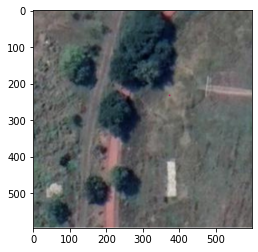

In [19]:
img = imread("/d1.png")
plt.imshow(img)

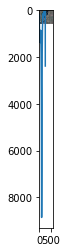

In [27]:
img_new=img[:,:,0:3]
plt.imshow(img_new)
histr = cv2.calcHist([img_new],[0],None,[256],[0,256])
plt.plot(histr)

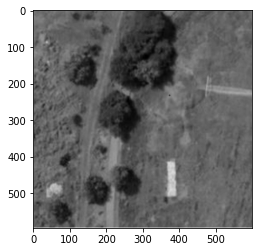

In [21]:
gray_img=rgb2gray(img_new)
plt.imshow(gray_img,cmap='gray')

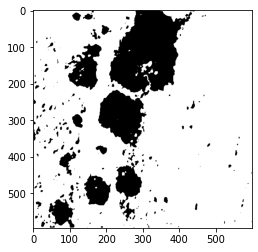

In [22]:
thresh1=threshold_otsu(gray_img)
binary=gray_img>thresh1

ret, thresh1 = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)
plt.imshow(binary,cmap='gray')


In [23]:
# counting the number of pixels
number_of_white_pixel = np.sum(binary == 1)
number_of_black_pixel = np.sum(binary == 0)
print('Number of white pixels:', number_of_white_pixel)
print('Number of black pixels:', number_of_black_pixel)
print('Area Of Tree(ie black pixel:)',number_of_black_pixel*0.02)

Number of white pixels: 282909
Number of black pixels: 72901
Area Of Tree(ie black pixel:) 1458.02


True

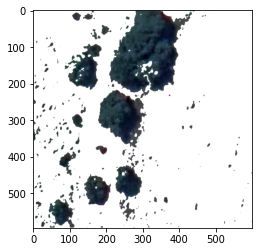

In [24]:
masked = img_new.copy()
masked[binary==1]=255
#crop1=masked[100:400,0:400,:]
plt.imshow(masked)

#To save output Image locally  
cv2.imwrite("/d1_op.png",masked)


In [28]:
# will only run on ides
cv2.imshow('Satellite Imagary Of Tree', img) 
cv2.imshow("Image after Masking", masked)
cv2.waitKey(0)
cv2.destroyAllWindows()